In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

df_exp = pd.read_csv(r"C:\Users\coys7\Apartments_prices\data\final_2.csv")

df_exp

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2
...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7


In [2]:
# sns.displot(df_exp['prices'], kde=True)
df_exp['prices'].value_counts()
count_area = 0
count_price = 0
for i in df_exp['Square_in_m^2']:
    if i > 250:
        count_area = count_area + 1
print(count_area)

for i in df_exp['prices']:
    if i > 300000000:
        count_price = count_price + 1
print(count_price)

28
17


<Axes: xlabel='prices', ylabel='Square_in_m^2'>

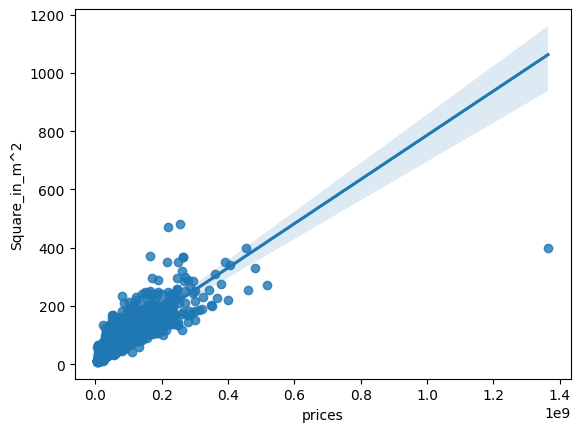

In [3]:
sns.regplot(x=df_exp['prices'], y=df_exp['Square_in_m^2'])

In [4]:
df_exp.drop(df_exp[df_exp['prices'] >= 300000000].index,inplace=True)
df_exp.drop(df_exp[df_exp['Square_in_m^2'] >= 250].index,inplace=True)

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2
...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7


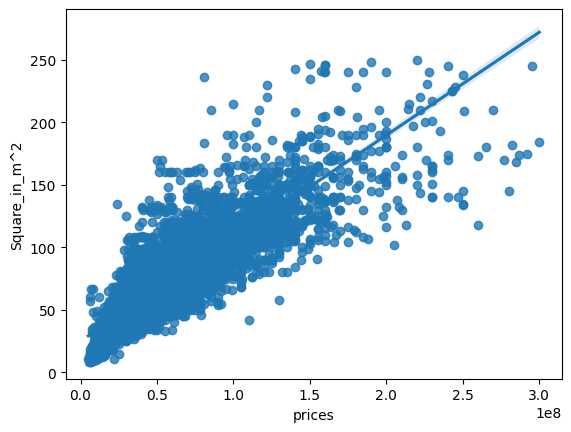

In [5]:
sns.regplot(x=df_exp['prices'], y=df_exp['Square_in_m^2'])
df_exp

In [6]:
all_dummies = pd.get_dummies(df_exp['District'])
all_dummies_Type = pd.get_dummies(df_exp['Type'])
df_exp_merged=df_exp.join(all_dummies)
df_exp_merged=df_exp_merged.join(all_dummies_Type)
df_exp_merged

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors,...,Алмалинский р-н,Ауэзовский р-н,Бостандыкский р-н,Жетысуский р-н,Медеуский р-н,Наурызбайский р-н,Турксибский р-н,кирпичный дом,монолитный дом,панельный дом
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12,...,0,0,1,0,0,0,0,0,1,0
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18,...,1,0,0,0,0,0,0,0,1,0
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1,...,0,0,0,0,0,0,0,1,0,0
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4,...,0,0,0,0,1,0,0,1,0,0
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12,...,0,0,0,0,1,0,0,0,1,0
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20,...,1,0,0,0,0,0,0,0,1,0
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4,...,0,0,0,0,1,0,0,1,0,0
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7,...,0,0,1,0,0,0,0,1,0,0


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split


y = df_exp_merged.prices

features = ['Rooms','Square_in_m^2','Floor','Total Floors', 'Year', 'Бостандыкский р-н','Ауэзовский р-н','Наурызбайский р-н','Алмалинский р-н',
            'Алатауский р-н','Турксибский р-н','Медеуский р-н','Жетысуский р-н', 'кирпичный дом', 'монолитный дом','панельный дом']
x=df_exp_merged[features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

def algorithm(model):
    model = model
    model.fit(train_x,train_y)
    model_prediction = model.predict(val_x)
    model_prediction_float = np.array(model_prediction, dtype=float)
    model_val_mae = mean_absolute_error (model_prediction, val_y)
    model_val_median_ae = median_absolute_error(model_prediction, val_y)
    return model_val_mae  #, model_val_median_ae

RF = algorithm(RandomForestRegressor(n_estimators = 100, random_state=1))
GNB = algorithm(GaussianNB())
LR = algorithm(LogisticRegression(max_iter=200))
DTC = algorithm(tree.DecisionTreeClassifier(random_state=1))
KNN = algorithm(KNeighborsClassifier())
svc = algorithm(SVC(probability=True))

c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
XGB = XGBRegressor(n_estimators = 1000, learning_rate=0.01)
XGB.fit(train_x, train_y, eval_set=[(val_x,val_y)], early_stopping_rounds=20)
XGB_predict = XGB.predict(val_x)
XGB_val_mae = mean_absolute_error(XGB_predict, val_y)

[0]	validation_0-rmse:52068935.29692
[1]	validation_0-rmse:51585148.13552
[2]	validation_0-rmse:51106858.69206
[3]	validation_0-rmse:50633171.57355
[4]	validation_0-rmse:50164979.44512
[5]	validation_0-rmse:49701033.85887
[6]	validation_0-rmse:49243922.74314
[7]	validation_0-rmse:48789457.90744
[8]	validation_0-rmse:48340767.46430
[9]	validation_0-rmse:47897011.52914
[10]	validation_0-rmse:47460020.48207
[11]	validation_0-rmse:47024986.30622
[12]	validation_0-rmse:46592385.47197
[13]	validation_0-rmse:46166858.12377
[14]	validation_0-rmse:45741027.14776
[15]	validation_0-rmse:45324415.13280
[16]	validation_0-rmse:44908242.87138
[17]	validation_0-rmse:44497315.46861
[18]	validation_0-rmse:44092643.02225
[19]	validation_0-rmse:43691254.85939
[20]	validation_0-rmse:43294509.41874
[21]	validation_0-rmse:42900595.93278
[22]	validation_0-rmse:42512209.69349
[23]	validation_0-rmse:42126835.71328
[24]	validation_0-rmse:41749031.68821
[25]	validation_0-rmse:41372610.69787
[26]	validation_0-rmse

c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-rmse:34981125.42496
[45]	validation_0-rmse:34678164.84524
[46]	validation_0-rmse:34380850.47095
[47]	validation_0-rmse:34086651.62154
[48]	validation_0-rmse:33794410.81774
[49]	validation_0-rmse:33503373.95834
[50]	validation_0-rmse:33216857.36092
[51]	validation_0-rmse:32933877.08319
[52]	validation_0-rmse:32651532.52331
[53]	validation_0-rmse:32374448.49477
[54]	validation_0-rmse:32097758.33824
[55]	validation_0-rmse:31827171.66489
[56]	validation_0-rmse:31559506.53624
[57]	validation_0-rmse:31293738.98701
[58]	validation_0-rmse:31031768.95620
[59]	validation_0-rmse:30771207.42511
[60]	validation_0-rmse:30514411.99205
[61]	validation_0-rmse:30262247.69137
[62]	validation_0-rmse:30009985.46666
[63]	validation_0-rmse:29763575.31371
[64]	validation_0-rmse:29517180.98526
[65]	validation_0-rmse:29272363.65950
[66]	validation_0-rmse:29031581.96822
[67]	validation_0-rmse:28796107.15082
[68]	validation_0-rmse:28560987.13763
[69]	validation_0-rmse:28331674.33099
[70]	validat

In [29]:
print("MAE of Random Forest Regressor: {:.3f}".format(RF))
print("MAE of XGBoost Regressor: {:.3f}".format(XGB_val_mae))
print("MAE of  Gaussian Naive Bayes: {:.3f}".format(GNB))
print("MAE of Logistic Regression: {:.3f}".format(LR))
print("MAE of Decision Tree Classifier: {:.3f}".format(DTC))
print("MAE of K-nearest Neighbors: {:.3f}".format(KNN))
print("MAE of Support Vector Classification: {:.3f}".format(svc))

MAE of Random Forest Regressor: 6002113.473
MAE of XGBoost Regressor: 5978377.873
MAE of  Gaussian Naive Bayes: 14477152.122
MAE of Logistic Regression: 11317941.282
MAE of Decision Tree Classifier: 7873388.468
MAE of K-nearest Neighbors: 10515047.517
MAE of Support Vector Classification: 17969646.405


In [34]:
models = ["Random Forest Regressor", "XGBoost", "Gaussian Naive Bayes", "Logistic Regression", "Decision Tree Regressor", "K-nearest Neighbors", "Support Vector"]
tests_mae =[RF, XGB_val_mae, GNB, LR, DTC, KNN, svc]
compare_models = pd.DataFrame({"Algorithms": models, "MAE": tests_mae})
# compare_models.sort_values(by = "MAE", ascending=True)
compare_models

,Algorithms,MAE
0,Random Forest Regressor,6.002113e+06
1,XGBoost,5.978378e+06
2,Gaussian Naive Bayes,1.447715e+07
3,Logistic Regression,1.131794e+07
4,Decision Tree Regressor,7.873388e+06
5,K-nearest Neighbors,1.051505e+07
6,Support Vector,1.796965e+07


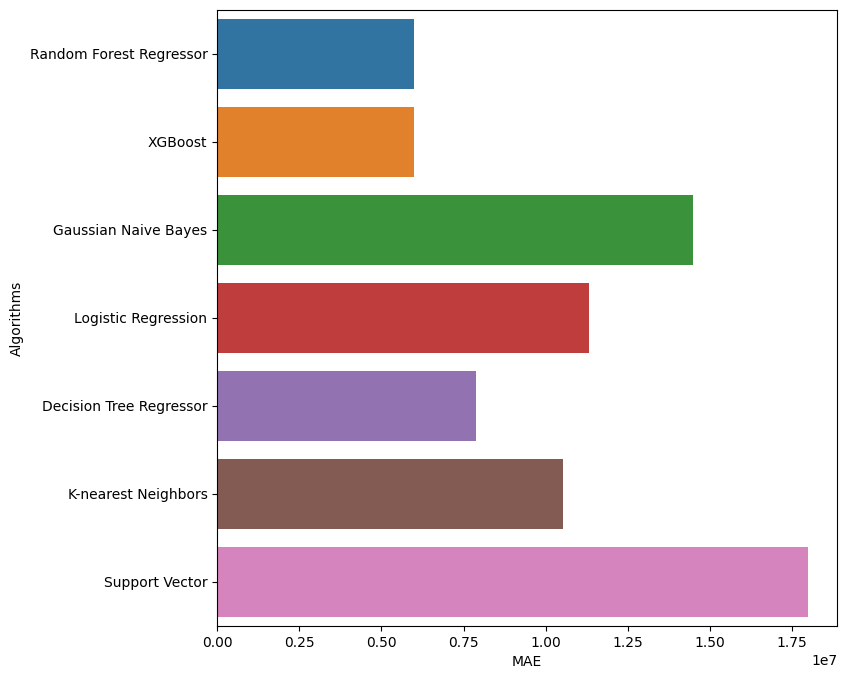

In [32]:
import matplotlib.pyplot as plt
plt.figure (figsize =(8,8))
sns.barplot(x = "MAE", y = "Algorithms", data = compare_models)
plt.show()

In [45]:
print("Best algorithm: \n",compare_models[compare_models['MAE']==compare_models['MAE'].min()])

Best algorithm: 
   Algorithms           MAE
1    XGBoost  5.978378e+06


In [21]:
# def algorithm_prediction(model):
#     model = model
#     model.fit(train_x,train_y)
#     model_prediction = model.predict(val_x)
#     model_prediction_float = np.array(model_prediction, dtype=float)
#     model_val_mae = mean_absolute_error (model_prediction, val_y)
#     model_val_median_ae = median_absolute_error(model_prediction, val_y)
#     return model_prediction


val_y1=val_y.copy()
gross =[]
pred = XGB_predict
for i in pred:
    gross.append(i)
df=pd.DataFrame(data=gross)
df = df.set_index(val_y.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1=pd.concat([val_y1, df], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
3769,36000000,34863084.0
6467,25000000,22692572.0
221,43200000,46359768.0
6830,52500000,50954928.0
3277,50500000,54518092.0


In [22]:
df1['diff'] = df1['predicted'] - df1['true']
pd.DataFrame({'Count':[(df1['diff']<0).sum(),(df1['diff']==0).sum(),(df1['diff']>0).sum()]},columns=["Count"], index = ['Underestimation', 'Exact Estimation', 'Overestimation'])


,Count
Underestimation,1655
Exact Estimation,0
Overestimation,1906


In [23]:
df1.sort_values(by = "diff", ascending=True)

,true,predicted,diff
14276,285000000,130597552.0,-154402448.0
313,265000000,137278928.0,-127721072.0
7566,230000000,119694080.0,-110305920.0
12557,230000000,119694080.0,-110305920.0
4288,250920000,150386272.0,-100533728.0
...,...,...,...
520,80616000,152148416.0,71532416.0
11290,116000000,191915008.0,75915008.0
6170,98000000,174686768.0,76686768.0
11742,140500000,218081936.0,77581936.0


In [24]:
df_merged=val_x.join(df1)
df_merged.sort_values(by = "diff", ascending=True)

,Rooms,Square_in_m^2,Floor,Total Floors,Year,Бостандыкский р-н,Ауэзовский р-н,Наурызбайский р-н,Алмалинский р-н,Алатауский р-н,Турксибский р-н,Медеуский р-н,Жетысуский р-н,кирпичный дом,монолитный дом,панельный дом,true,predicted,diff
14276,5,168.0,5,12,2013,0,0,0,0,0,0,1,0,0,1,0,285000000,130597552.0,-154402448.0
313,4,180.0,3,4,2006,1,0,0,0,0,0,0,0,0,1,0,265000000,137278928.0,-127721072.0
7566,4,165.0,2,3,2016,1,0,0,0,0,0,0,0,0,1,0,230000000,119694080.0,-110305920.0
12557,4,165.0,2,3,2016,1,0,0,0,0,0,0,0,0,1,0,230000000,119694080.0,-110305920.0
4288,5,209.1,3,3,2022,1,0,0,0,0,0,0,0,0,1,0,250920000,150386272.0,-100533728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,4,183.6,1,8,2021,0,1,0,0,0,0,0,0,0,1,0,80616000,152148416.0,71532416.0
11290,4,153.0,15,19,2016,1,0,0,0,0,0,0,0,0,1,0,116000000,191915008.0,75915008.0
6170,4,140.0,4,16,2022,0,0,0,1,0,0,0,0,0,1,0,98000000,174686768.0,76686768.0
11742,3,170.0,21,21,2014,0,0,0,0,0,0,1,0,0,1,0,140500000,218081936.0,77581936.0


<Axes: xlabel='diff', ylabel='Square_in_m^2'>

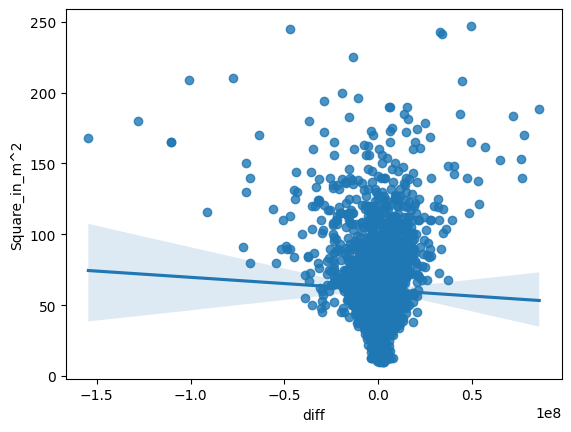

In [25]:
sns.regplot(x=df_merged['diff'], y=df_merged['Square_in_m^2'])

<Axes: xlabel='diff', ylabel='Rooms'>

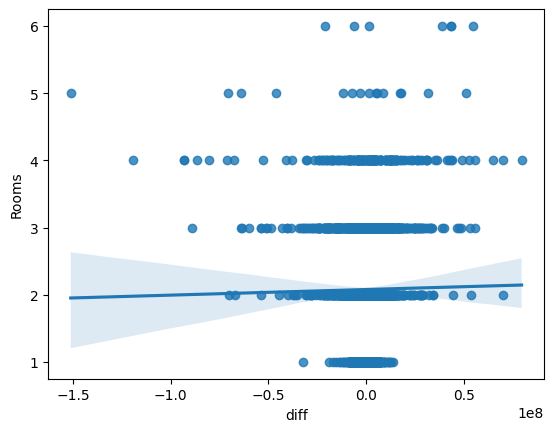

In [46]:
sns.regplot(x=df_merged['diff'], y=df_merged['Rooms'])

<Axes: xlabel='diff', ylabel='кирпичный дом'>

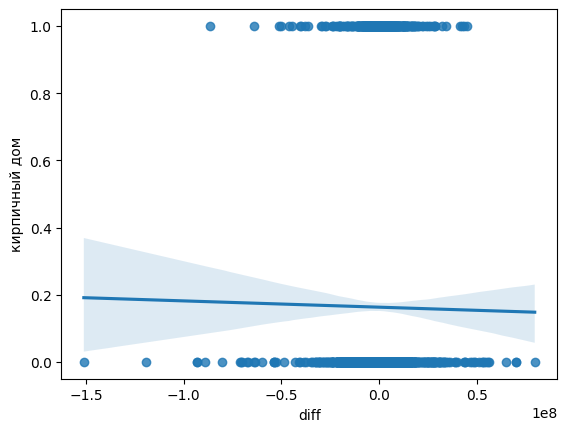

In [47]:
sns.regplot(x=df_merged['diff'], y=df_merged['кирпичный дом'])

<Axes: xlabel='diff', ylabel='Rooms'>

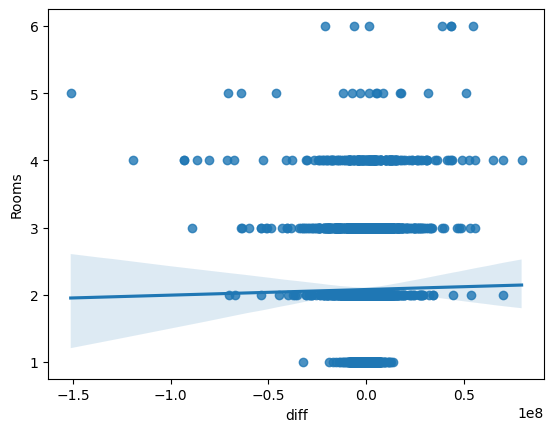

In [48]:
sns.regplot(x=df_merged['diff'], y=df_merged['Rooms'])